In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

**age:** The age of the patient (in years).

**sex:** The gender of the patient (1 = male, 0 = female).

**cp (chest pain type):**

0: Typical angina

1: Atypical angina

2: Non-anginal pain

3: Asymptomatic

**trestbps (resting blood pressure):** Resting blood pressure (in mm Hg) at the time of hospital admission.

**chol (serum cholesterol):** Serum cholesterol in mg/dl.

**fbs (fasting blood sugar > 120 mg/dl):**

1: True

0: False

**restecg (resting electrocardiographic results):**

0: Normal

1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach (maximum heart rate achieved):** The maximum heart rate achieved during the stress test.

**exang (exercise-induced angina):**

1: Yes

0: No

**oldpeak:** ST depression induced by exercise relative to rest (an indicator of possible heart problems).

**slope (slope of the peak exercise ST segment):**

0: Upsloping

1: Flat

2: Downsloping

**ca (number of major vessels (0-3) colored by fluoroscopy):** The number of major blood vessels (0-3) colored by the imaging.

**thal (thalassemia):**

1: Normal

2: Fixed defect

3: Reversible defect

**target:** The presence of heart disease (the predicted attribute).

1: Presence of heart disease

0: Absence of heart disease

In [3]:
df = pd.read_csv("heart.csv")
df.head()                            # sex: 1=male, 0=female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# default describe function returns output for numeric columns only
# for categorical columns : use describe(include='all') - gives unique,top,frequency
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(302, 14)

In [14]:
df.duplicated().sum()

0

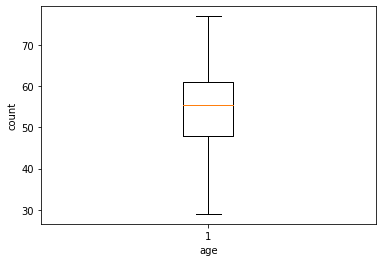

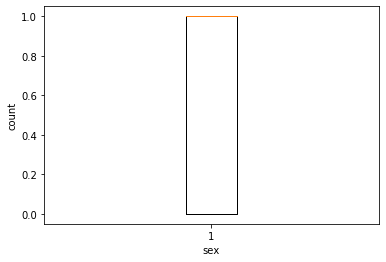

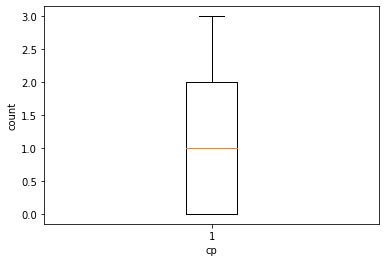

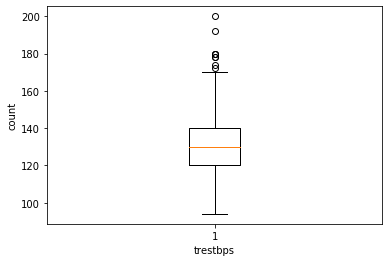

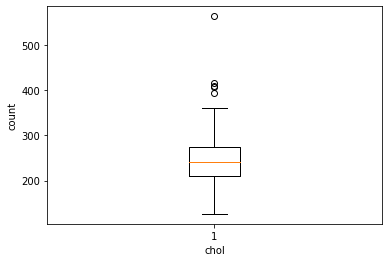

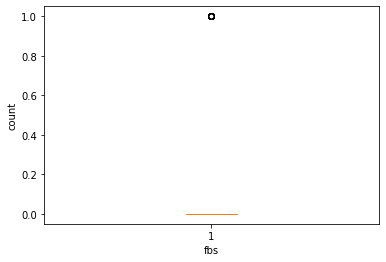

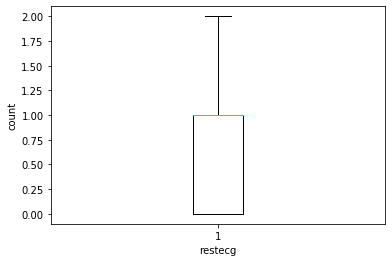

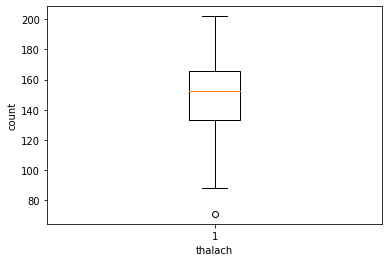

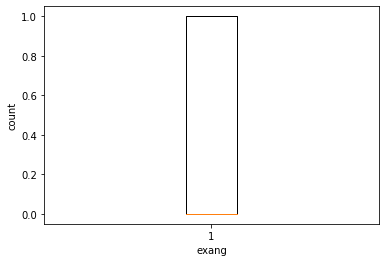

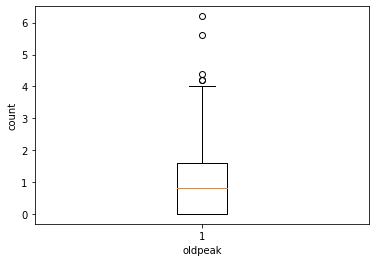

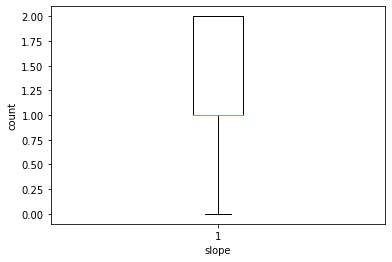

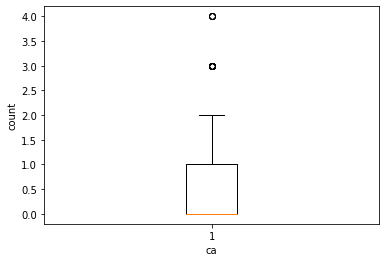

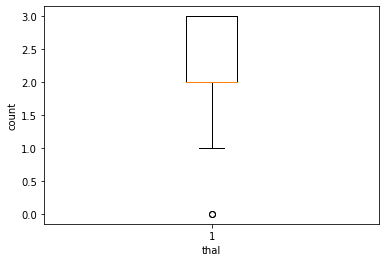

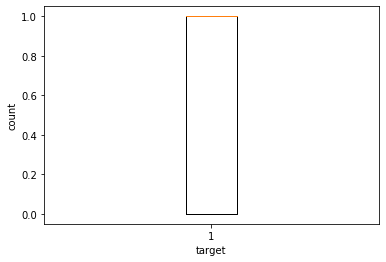

In [15]:
for col in df.columns:
    if(df[col].dtype != 'object'):
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

In [16]:
cols_woutliers = ['trestbps', 'chol', 'thalach', 'oldpeak']
cols_woutliers

['trestbps', 'chol', 'thalach', 'oldpeak']

In [17]:
for col in cols_woutliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lf = q1 - 1.5*IQR
    uf = q3 + 1.5*IQR
    df = df[(df[col] >= lf) & (df[col] <= uf)]

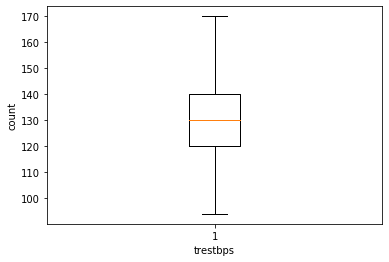

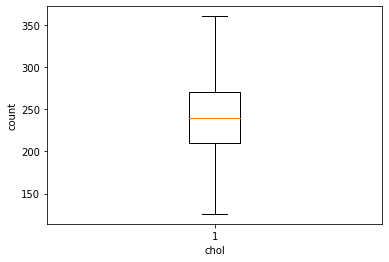

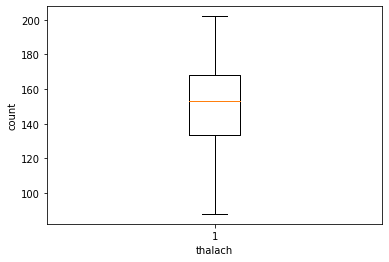

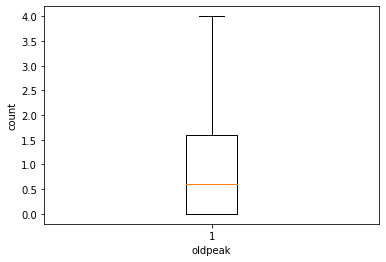

In [18]:
for col in cols_woutliers:
    if(df[col].dtype != 'object'):
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

(array([ 1., 10., 33., 38., 35., 55., 58., 37., 13.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

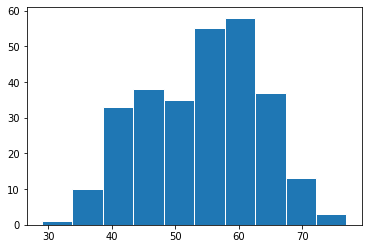

In [19]:
# Visualisation
plt.hist(df['age'], edgecolor = 'white')

majority of the patients are from age group 52 to 62

In [20]:
df['age'].value_counts()

58    18
57    17
54    15
52    12
59    12
44    11
51    11
60    11
41    10
62     9
56     9
64     9
63     8
53     8
61     8
42     8
43     8
45     8
46     7
48     7
50     7
67     7
65     7
55     6
66     6
49     5
47     5
35     4
70     4
39     4
69     3
68     3
71     3
40     3
37     2
34     2
38     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

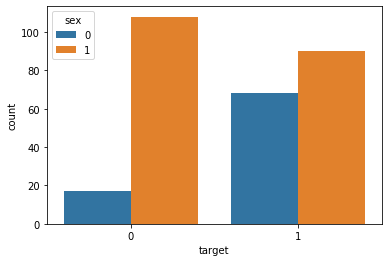

In [21]:
sns.countplot(data=df, x='target', hue='sex')

sex: 0 = male, 1 = female
* majority of the male patients are healthier as compared to female patients.

In [22]:
# splitting data
x = df.iloc[:,:-1]         #except target column
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [24]:
# split data into train and test
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.8, random_state=42)      # random_state: which fixes the data (makes the data permanent)

In [26]:
# model building
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
ypred = dt.predict(xtest)

In [30]:
ypred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [31]:
ytest

10     1
263    0
145    1
216    0
77     1
290    0
281    0
166    0
44     1
175    0
48     1
284    0
161    1
261    0
5      1
227    0
267    0
188    0
242    0
35     1
115    1
62     1
70     1
228    0
58     1
97     1
79     1
165    0
288    0
114    1
262    0
199    0
182    0
47     1
81     1
215    0
68     1
84     1
285    0
133    1
32     1
23     1
25     1
149    1
75     1
209    0
234    0
271    0
93     1
218    0
174    0
180    0
95     1
6      1
131    1
283    0
153    1
Name: target, dtype: int64

In [32]:
# Performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
cm = confusion_matrix(ypred,ytest)
cm

array([[19,  8],
       [ 8, 22]], dtype=int64)

In [34]:
accuracy_score(ytest, ypred)

0.7192982456140351

In [38]:
(19+22)/(19+8+8+22)            # accuracy = (tp+tn)/(tp+tn+fp+fn)

0.7192982456140351

In [51]:
# hyperparameter tuning : using tree depth - height of the tree
parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns = ['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [62]:
df1 = pd.DataFrame(columns = ["max_depth", "accuracy"])

for X in parameter_values:
    model = DecisionTreeClassifier(max_depth=X)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    acc_score = accuracy_score(ytest,ypred)*100
    df1 = pd.concat([df1, pd.DataFrame({'max_depth': [X], 'accuracy': [acc_score]})], ignore_index=True)
df1

,max_depth,accuracy
0,1,75.438596
1,2,82.456140
2,3,84.210526
3,4,78.947368
4,5,78.947368
5,6,71.929825
6,7,68.421053
7,8,66.666667
8,9,66.666667
9,10,66.666667


In [63]:
m = df1['accuracy'].max()
m

84.21052631578947

In [64]:
df1[df1['accuracy'] == m]

,max_depth,accuracy
2,3,84.210526


In [65]:
final_model = DecisionTreeClassifier(max_depth = 3)
final_model.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
y_pred = final_model.predict(xtest)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [67]:
accuracy_score(ytest, y_pred)

0.8421052631578947

In [68]:
# plot Decision Tree
from sklearn import tree

[Text(167.4, 190.26, 'X[12] <= 2.5\ngini = 0.491\nsamples = 226\nvalue = [98, 128]'),
 Text(83.7, 135.9, 'X[11] <= 0.5\ngini = 0.371\nsamples = 142\nvalue = [35, 107]'),
 Text(41.85, 81.53999999999999, 'X[9] <= 2.7\ngini = 0.19\nsamples = 94\nvalue = [10, 84]'),
 Text(20.925, 27.180000000000007, 'gini = 0.145\nsamples = 89\nvalue = [7, 82]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.499\nsamples = 48\nvalue = [25, 23]'),
 Text(104.625, 27.180000000000007, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(146.475, 27.180000000000007, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 84\nvalue = [63, 21]'),
 Text(209.25, 81.53999999999999, 'X[9] <= 0.65\ngini = 0.165\nsamples = 55\nvalue = [50, 5]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(23

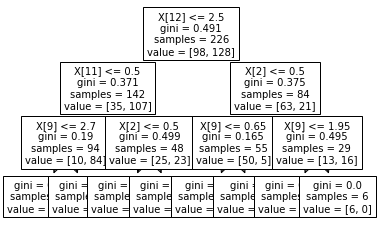

In [70]:
tree.plot_tree(final_model, fontsize=10)